In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

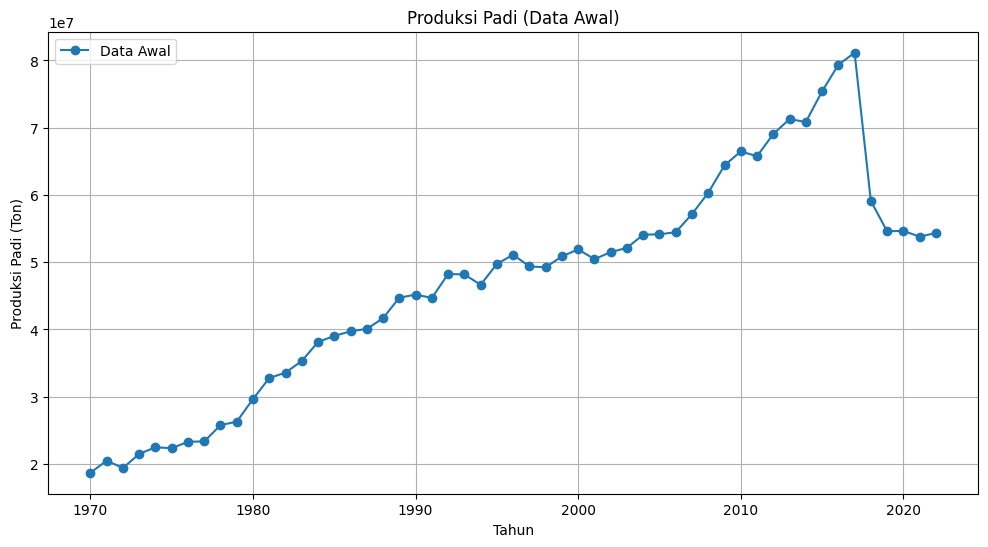

In [2]:
# Membuat DataFrame dari data
data = {
    "Tahun": list(range(1970, 2023)),
    "Produksi": [
        18693649, 20483687, 19393933, 21490578, 22476073, 22339455, 23300939, 23347132,
        25771570, 26282663, 29651905, 32774176, 33583677, 35303106, 38136446, 39032945,
        39726761, 40078195, 41676170, 44725582, 45178751, 44688247, 48240009, 48181087,
        46641524, 49744140, 51101506, 49377054, 49236692, 50866387, 51898852, 50460782,
        51489694, 52137604, 54088468, 54151097, 54454937, 57157435, 60325925, 64398890,
        66469394, 65756904, 69056126, 71279709, 70846465, 75397841, 79354767, 81148617,
        59101577.84, 54604033.34, 54649202.24, 53802637.44, 54338410.44
    ]
}

df = pd.DataFrame(data)

# Visualisasi Data Awal
plt.figure(figsize=(12, 6))
plt.plot(df['Tahun'], df['Produksi'], marker='o', label='Data Awal')
plt.title('Produksi Padi (Data Awal)')
plt.xlabel('Tahun')
plt.ylabel('Produksi Padi (Ton)')
plt.grid()
plt.legend()
plt.show()

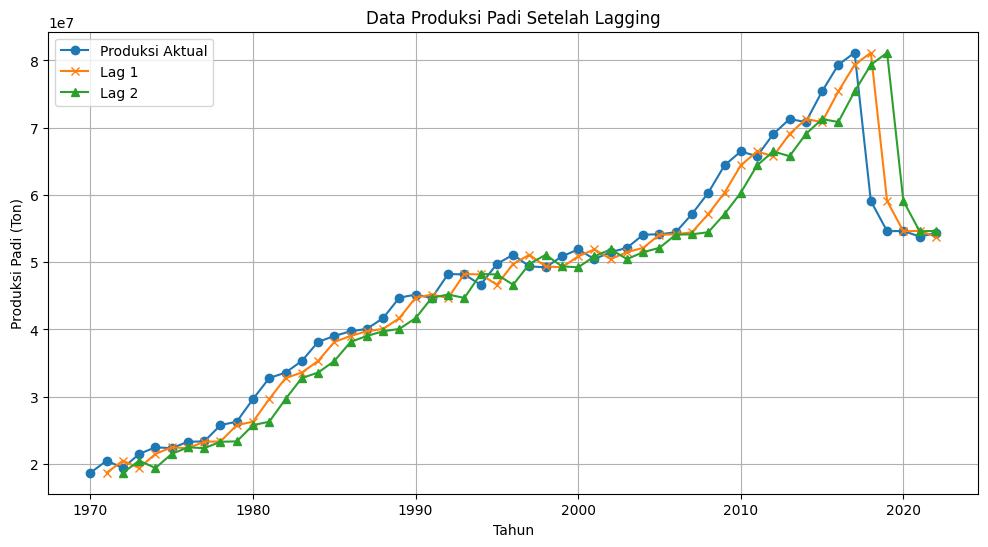

In [3]:
# Membuat data lagging
df['Produksi_Lag1'] = df['Produksi'].shift(1)
df['Produksi_Lag2'] = df['Produksi'].shift(2)

# Visualisasi Data Setelah Lagging
plt.figure(figsize=(12, 6))
plt.plot(df['Tahun'], df['Produksi'], marker='o', label='Produksi Aktual')
plt.plot(df['Tahun'], df['Produksi_Lag1'], marker='x', label='Lag 1')
plt.plot(df['Tahun'], df['Produksi_Lag2'], marker='^', label='Lag 2')
plt.title('Data Produksi Padi Setelah Lagging')
plt.xlabel('Tahun')
plt.ylabel('Produksi Padi (Ton)')
plt.grid()
plt.legend()
plt.show()

In [4]:
# Menghapus baris dengan nilai NaN akibat lagging
df = df.dropna()

# Memisahkan fitur (X) dan target (y)
X = df[['Produksi_Lag1', 'Produksi_Lag2']]
y = df['Produksi']

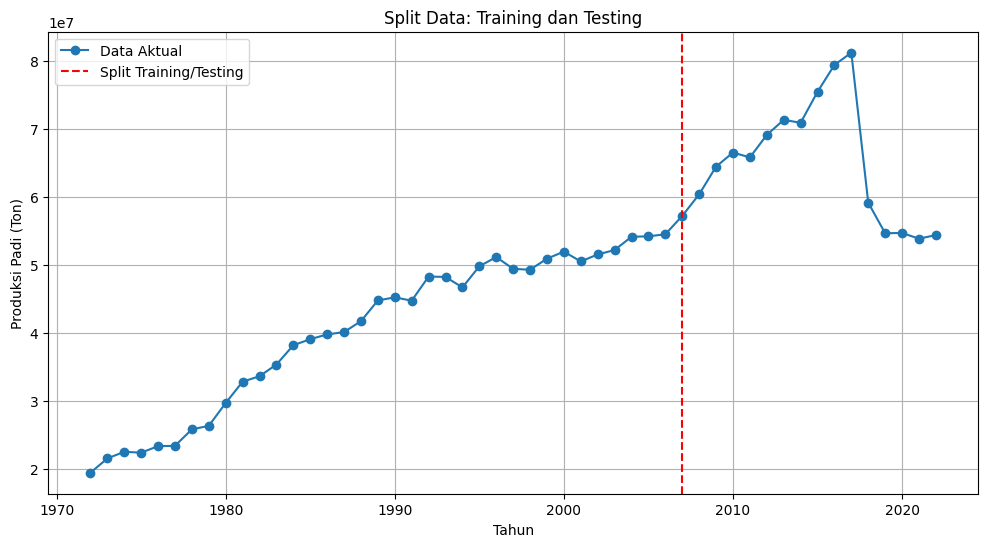

In [5]:
# Membagi data menjadi training (70%) dan testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Visualisasi Split Data
plt.figure(figsize=(12, 6))
plt.plot(df['Tahun'], y, marker='o', label='Data Aktual')
plt.axvline(df['Tahun'].iloc[len(X_train)], color='red', linestyle='--', label='Split Training/Testing')
plt.title('Split Data: Training dan Testing')
plt.xlabel('Tahun')
plt.ylabel('Produksi Padi (Ton)')
plt.grid()
plt.legend()
plt.show()

In [6]:
# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

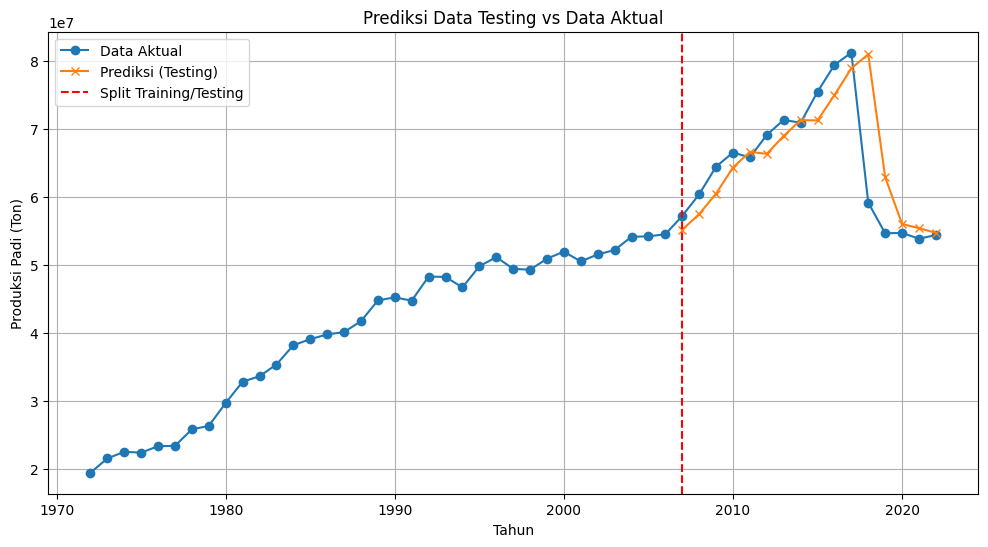

In [7]:
# Prediksi pada data testing
y_pred = model.predict(X_test)

# Visualisasi Hasil Prediksi vs Data Aktual
plt.figure(figsize=(12, 6))
plt.plot(df['Tahun'], y, marker='o', label='Data Aktual')
plt.plot(df['Tahun'].iloc[len(X_train):], y_pred, marker='x', label='Prediksi (Testing)')
plt.axvline(df['Tahun'].iloc[len(X_train)], color='red', linestyle='--', label='Split Training/Testing')
plt.title('Prediksi Data Testing vs Data Aktual')
plt.xlabel('Tahun')
plt.ylabel('Produksi Padi (Ton)')
plt.grid()
plt.legend()
plt.show()

In [8]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Menampilkan metrik evaluasi
print("Evaluasi Model:")
print(f"MSE  : {mse}")
print(f"RMSE : {rmse}")
print(f"MAPE : {mape * 100:.2f}%")

Evaluasi Model:
MSE  : 39864931467212.07
RMSE : 6313868.185764736
MAPE : 6.18%


In [9]:
# Prediksi tahun 2023 dan 2024
last_values = df.iloc[-2:]['Produksi'].values
pred_2023 = model.predict([[last_values[-1], last_values[-2]]])[0]
pred_2024 = model.predict([[pred_2023, last_values[-1]]])[0]

print("\nPrediksi Produksi Padi:")
print(f"Tahun 2023: {pred_2023:.2f} ton")
print(f"Tahun 2024: {pred_2024:.2f} ton")

# Visualisasi Prediksi Tahun 2023 dan 2024
future_years = [2023, 2024]
future_preds = [pred_2023, pred_2024]

plt.figure(figsize=(12, 6))
plt.plot(df['Tahun'], y, marker='o', label='Data Aktual')
plt.plot(future_years, future_preds, marker='s', color='orange', label='Prediksi 2023 & 2024')
plt.title('Prediksi Produksi Padi untuk Tahun 2023 dan 2024')
plt.xlabel('Tahun')
plt.ylabel('Produksi Padi (Ton)')
plt.grid()
plt.legend()
plt.show()
